<a href="https://colab.research.google.com/github/Palak2506/ML-project/blob/main/Salespredictiondataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


In [3]:
# Step 2: Load Dataset
df = pd.read_excel('advertising_sales_data.xlsx')

In [4]:
# Step 3: Basic Exploration
print("First 5 rows:")
print(df.head())

First 5 rows:
  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


In [5]:
# ========================================
# Question 1: Average TV advertising spend
# ========================================
avg_tv = df['TV'].mean()
print(f"\n1. Average TV advertising spend: ${avg_tv:.2f}")


1. Average TV advertising spend: $147.04


In [6]:
# ========================================
# Question 2: Correlation between Radio and Sales
# ========================================
correlation = df[['Radio', 'Sales']].corr().iloc[0, 1]
print(f"\n2. Correlation between Radio and Sales: {correlation:.4f}")


2. Correlation between Radio and Sales: 0.3497


In [7]:
# ========================================
# Question 3: Feature with Highest Impact on Sales
# ========================================
correlations = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()['Sales'].drop('Sales')
top_feature = correlations.abs().idxmax()
print(f"\n3. Feature with highest impact on Sales: {top_feature} (Correlation: {correlations[top_feature]:.4f})")


3. Feature with highest impact on Sales: TV (Correlation: 0.9012)


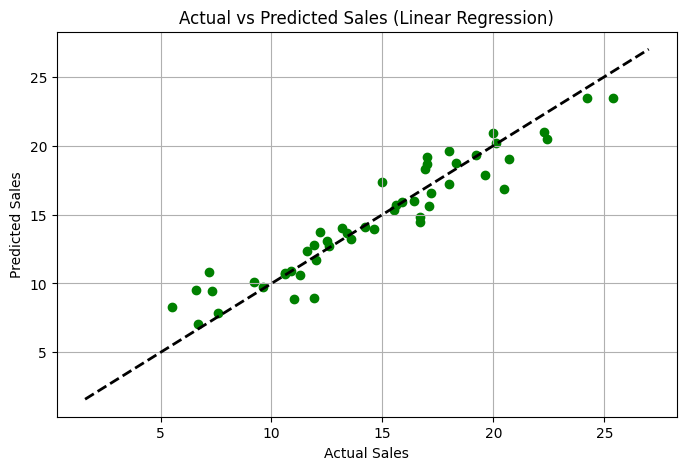

In [10]:
df.dropna(inplace=True)  # Removes rows with missing values

# ========================================
# Question 4: Linear Regression Model (All Features)
# ========================================
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.grid(True)
plt.show()


In [11]:
# ========================================
# Question 5: Predict for New Ad Budget
# ========================================
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
predicted_sales = model.predict(new_data)[0]
print(f"\n5. Predicted sales for TV=$200, Radio=$40, Newspaper=$50: {predicted_sales:.2f}")


5. Predicted sales for TV=$200, Radio=$40, Newspaper=$50: 19.90


In [12]:
# ========================================
# Question 6: Model Performance with Normalized Data
# ========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, random_state=42)
model_norm = LinearRegression()
model_norm.fit(X_train_scaled, y_train)
y_pred_scaled = model_norm.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)
print(f"\n6. Performance with normalization: MSE = {mse:.4f}, R² = {r2:.4f}")



6. Performance with normalization: MSE = 2.2955, R² = 0.8982


In [13]:
# ========================================
# Question 7: Model with Only Radio and Newspaper
# ========================================
X_alt = df[['Radio', 'Newspaper']]
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y, random_state=42)

model_alt = LinearRegression()
model_alt.fit(X_train_alt, y_train_alt)
y_pred_alt = model_alt.predict(X_test_alt)

alt_r2 = r2_score(y_test_alt, y_pred_alt)
print(f"\n7. R² Score using only Radio and Newspaper: {alt_r2:.4f}")


7. R² Score using only Radio and Newspaper: -0.1880
